In this project, I will code and comment for MP2. Importing my own dataset, examining the dataset, cleaning the dataset, writing funcitons for ease of use, and creating my own visualizations for critical insights for the company.

This company is an IT consulting start-up, DataSphere, and isn't sure who to hire and what to pay each employee for each title. My boss asked me to analyze this dataset to discover what rates are for specific titles, job categories, and years of experience. The CEO also wants to be highly inclusive, and would like information on current workforce demographics and diversity. 

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Insepct and clean dataset

In [79]:
#import data
df = pd.read_csv("Salary.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [80]:
#drop missing values
cleanDF = df.dropna()
print(cleanDF.dtypes)


Age                    float64
Gender                  object
Education Level          int64
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
Senior                   int64
dtype: object


In [81]:
#make objects as type string (still show up as an object, but printed strings shown below)
cleanDF['Gender'] = cleanDF['Gender'].map(str)
cleanDF['Job Title'] = cleanDF['Job Title'].map(str)
cleanDF['Country'] = cleanDF['Country'].map(str)
cleanDF['Race'] = cleanDF['Race'].map(str)


In [82]:
print(cleanDF['Gender'].unique())

['Male' 'Female']


In [83]:
#turn 0 and 1 binary to senior and non-senior for more descriptive
cleanDF['Senior'] = cleanDF['Senior'].replace({0: 'Non-senior', 1: 'Senior'})
cleanDF['Senior']

0       Non-senior
1       Non-senior
2           Senior
3       Non-senior
4       Non-senior
           ...    
6679    Non-senior
6680    Non-senior
6681    Non-senior
6682    Non-senior
6683    Non-senior
Name: Senior, Length: 6684, dtype: object

In [84]:
#store all categories in job title
jobGroup = df.groupby("Job Title").size()
print(jobGroup)

Job Title
Account Executive             1
Account Manager               4
Accountant                    6
Administrative Assistant      2
Advertising Coordinator       1
                           ... 
UX Researcher                 1
VP of Finance                 1
VP of Operations              1
Web Designer                  1
Web Developer               129
Length: 129, dtype: int64


In [85]:
#store all categories in country
countryGroup = df.groupby("Country").size()
print(countryGroup)

Country
Australia    1335
Canada       1322
China        1339
UK           1332
USA          1356
dtype: int64


In [86]:
#store all categories in race
raceGroup = df.groupby("Race").size()
print(raceGroup)

Race
African American     352
Asian               1599
Australian           452
Black                435
Chinese              443
Hispanic             322
Korean               457
Mixed                334
Welsh                333
White               1957
dtype: int64


Create some demographic visualizations

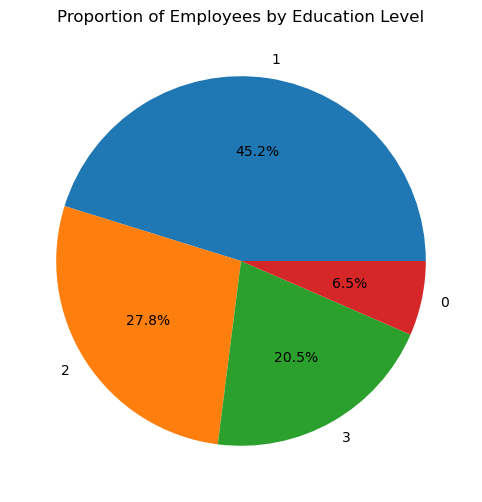

In [87]:
#create a pie chart to describe the distribution of employees by education level
plt.figure(figsize=(8, 6))
df['Education Level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Employees by Education Level')
plt.ylabel('')
plt.show()

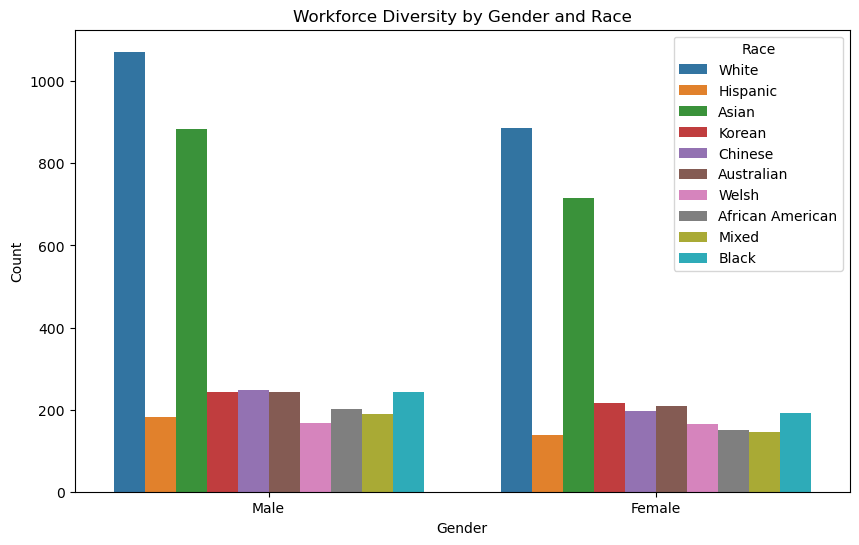

In [88]:
#create a countplot/barchart of workforce diversity, including gender and race
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Race')
plt.title('Workforce Diversity by Gender and Race')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Race')
plt.show()

Create visualizations for actionable insigts

/Users/haydenraikes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/haydenraikes/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


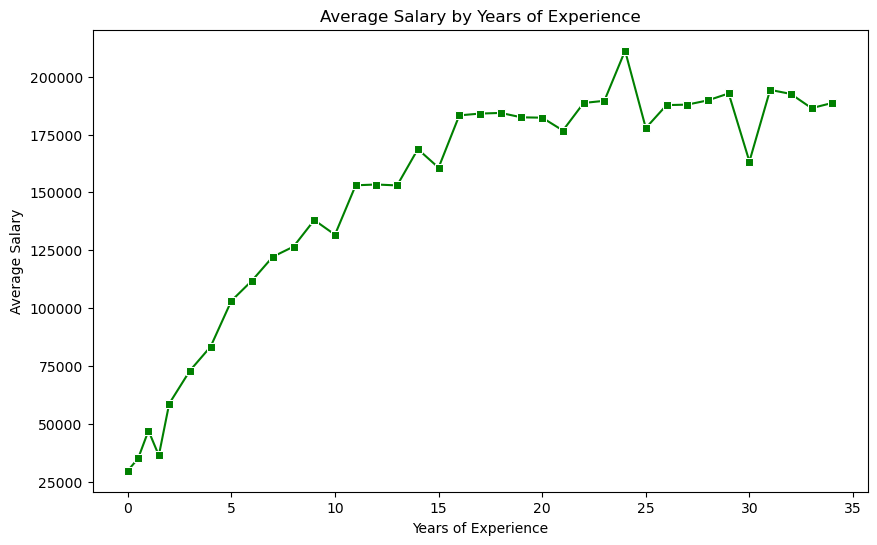

In [89]:
#group years of eperience and salary together by averages for vis
avgSalaryByExp = df.groupby('Years of Experience')['Salary'].mean().reset_index()

#create a line plot for years of experience by average salary 
plt.figure(figsize=(10, 6))
sns.lineplot(data=avgSalaryByExp, x='Years of Experience', y='Salary', marker='s', color='green')
plt.title('Average Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.show()

In [90]:
#after making multiple attempts at using job title and other columns with lots of different entry types I decided it would be best 
#   to make a function to categorize job titles for easier use in visualizations

#looks up if a word is in title and add it to that category
def categorizeJobs(job_title):
    if 'Manager' in job_title:
        return 'Managerial'
    elif 'Engineer' in job_title:
        return 'Engineering'
    elif 'Analyst' in job_title:
        return 'Analysis'
    elif 'Developer' in job_title:
        return 'Development'
    else:
        return 'Other'

#apply category func to the whole job title column, make that a new column
df['Job Category'] = df['Job Title'].apply(categorizeJobs)

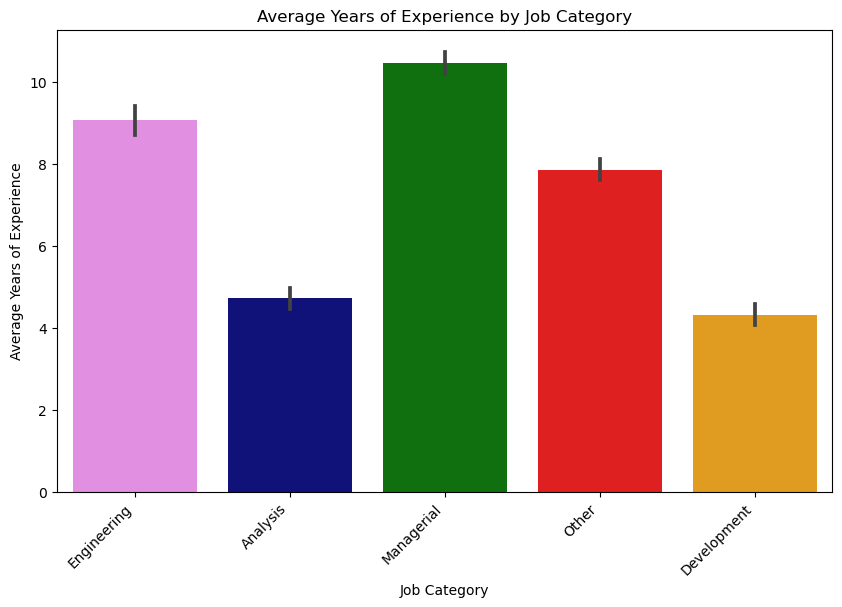

In [107]:
#create barplot of job category by years of experienc
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Job Category', y='Years of Experience', palette=['violet', 'darkblue', 'green', 'red', 'orange'])
plt.title('Average Years of Experience by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45, ha='right')
plt.show()

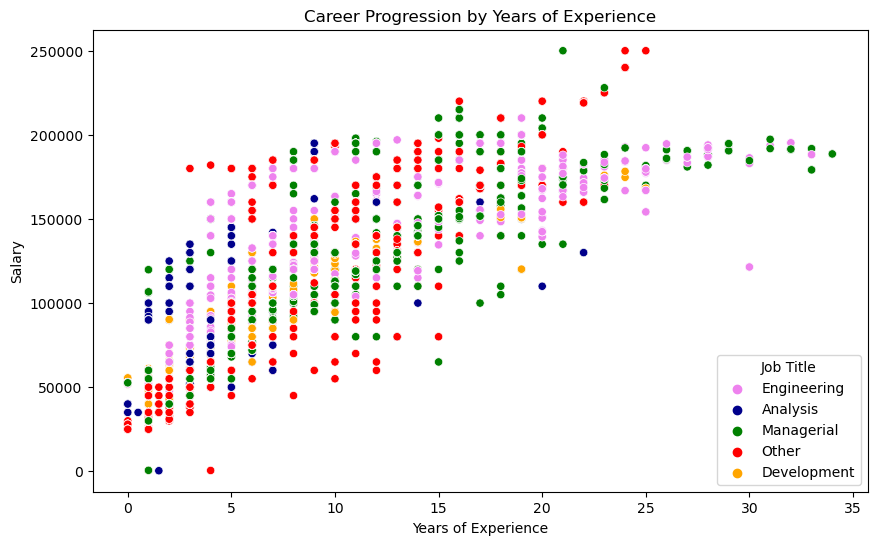

In [108]:
#create scatterplot by years of experience, salary, and job category
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Job Category', palette=['violet', 'darkblue', 'green', 'red', 'orange'])
plt.title('Career Progression by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(title='Job Title')
plt.show()